MOVIE RATING PREDICTION WITH PYTHON

In [155]:
import pandas as pd
import numpy as np

In [156]:
india_movies_df=pd.read_csv('Datasets/IMDb Movies India.csv',encoding='latin1')


In [157]:
india_movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [158]:
india_movies_df.shape

(15509, 10)

In [159]:
india_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [160]:
india_movies_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [161]:

india_movies_df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Handling Null/ Missing values

In [162]:
india_movies_df['Rating']=india_movies_df['Rating'].fillna(india_movies_df['Rating'].median())

Votes

In [163]:
india_movies_df['Votes']=india_movies_df['Votes'].str.replace(',','',regex=True)

In [164]:
india_movies_df['Votes']=pd.to_numeric(india_movies_df['Votes'],errors='coerce')

In [165]:
india_movies_df['Votes']=india_movies_df['Votes'].fillna(0).astype(int)

Name 

In [166]:
india_movies_df['Name']=india_movies_df['Name'].str.replace(r'\(.*?\)','',regex=True).str.strip()

In [167]:
india_movies_df['Name']=india_movies_df['Name'].str.replace(r'[^\w\s]','',regex=True).str.strip()

In [168]:
india_movies_df['Name']=india_movies_df['Name'].str.strip()

Actors

In [169]:
india_movies_df['Actors']=india_movies_df['Actor 1']+' '+india_movies_df['Actor 2']+' '+india_movies_df['Actor 3']

In [170]:
india_movies_df=india_movies_df.drop(columns=['Actor 1','Actor 2','Actor 3'],axis=1)

Dropping Duplicates

In [171]:
india_movies_df=india_movies_df.drop_duplicates()

Year

In [172]:
india_movies_df['Year']=india_movies_df['Year'].str.extract(r'(\d{4})').astype(float)

In [173]:
india_movies_df['Year']=india_movies_df['Year'].astype('Int64')

In [174]:
india_movies_df=india_movies_df.dropna()

In [175]:
india_movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actors
1,Gadhvi,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal Vivek Ghamande Arvind Jangid
2,Homecoming,2021,90 min,"Drama, Musical",6.0,0,Soumyajit Majumdar,Sayani Gupta Plabita Borthakur Roy Angana
3,Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik Ishita Raj Siddhant Kapoor
4,And Once Again,2010,105 min,Drama,6.0,0,Amol Palekar,Rajat Kapoor Rituparna Sengupta Antara Mali
5,Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol Aishwarya Rai Bachchan Shammi Kapoor


In [176]:
india_movies_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actors      0
dtype: int64

In [177]:
india_movies_df.shape

(6444, 8)

In [178]:
india_movies_df.describe()

,Year,Rating,Votes
count,6444.0,6444.000000,6444.000000
mean,1996.730447,5.910894,2369.025295
std,20.329533,1.294720,12823.263726
min,1931.0,1.100000,0.000000
25%,1983.0,5.200000,17.000000
50%,2003.0,6.000000,85.000000
75%,2014.0,6.800000,673.000000
max,2022.0,10.000000,591417.000000


In [179]:

india_movies_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actors
1,Gadhvi,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal Vivek Ghamande Arvind Jangid
2,Homecoming,2021,90 min,"Drama, Musical",6.0,0,Soumyajit Majumdar,Sayani Gupta Plabita Borthakur Roy Angana
3,Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik Ishita Raj Siddhant Kapoor
4,And Once Again,2010,105 min,Drama,6.0,0,Amol Palekar,Rajat Kapoor Rituparna Sengupta Antara Mali
5,Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol Aishwarya Rai Bachchan Shammi Kapoor
6,Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill Minissha Lamba Yashpal Sharma
8,A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave Muntazir Ahmad Kiran Bhatia
9,Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine Fathima Babu Byon
10,116 An Ode to Lost Love,2004,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri Gulshan Grover Atul Kulkarni
11,1137 Ek Tera Saath,2016,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry Anubhav Dhir Hritu Dudani


Visualization

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

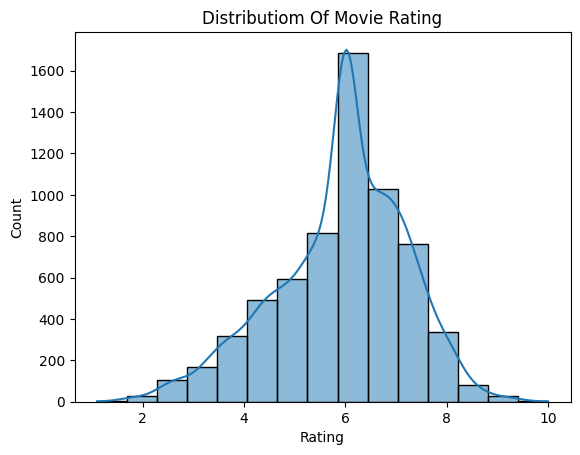

In [181]:
sns.histplot(india_movies_df['Rating'],kde=True,bins=15)
plt.title('Distributiom Of Movie Rating')
plt.show()

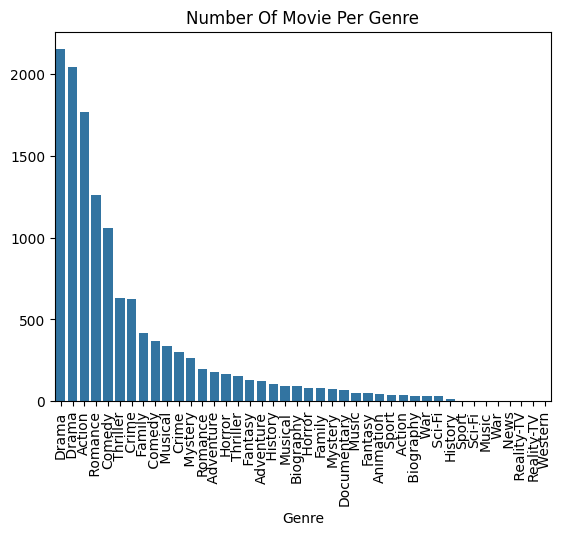

In [182]:
genre_count=india_movies_df['Genre'].str.split(',').explode().value_counts()
sns.barplot(x=genre_count.index,y=genre_count.values)
plt.title('Number Of Movie Per Genre')
plt.xticks(rotation=90)
plt.show()

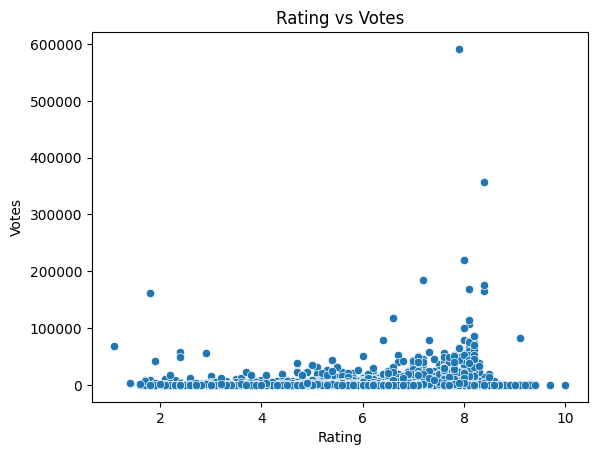

In [183]:
india_movies_df['Votes']=india_movies_df['Votes'].astype(float,errors='ignore')
sns.scatterplot(x='Rating',y='Votes',data=india_movies_df)
plt.title('Rating vs Votes')
plt.show()

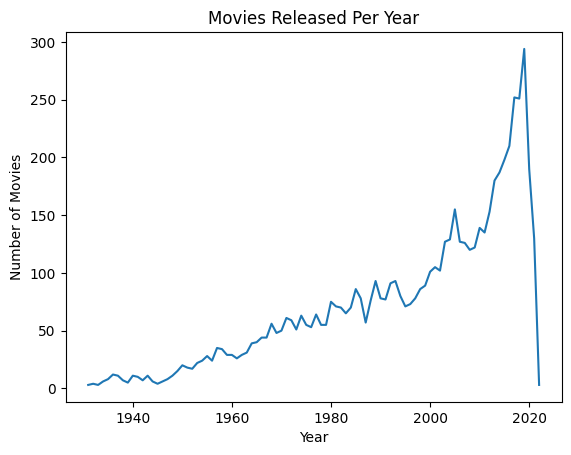

In [184]:
india_movies_df.loc[:,'Year']=india_movies_df['Year'].astype(float,errors='ignore')
year_count=india_movies_df['Year'].value_counts().sort_index()
sns.lineplot(x=year_count.index,y=year_count.values)
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

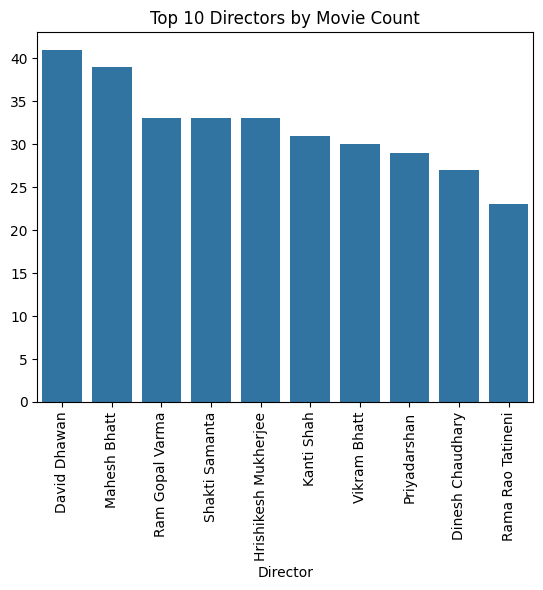

In [185]:
director_count=india_movies_df['Director'].value_counts().head(10)
sns.barplot(x=director_count.index,y=director_count.values)
plt.title('Top 10 Directors by Movie Count')
plt.xticks(rotation=90)
plt.show()

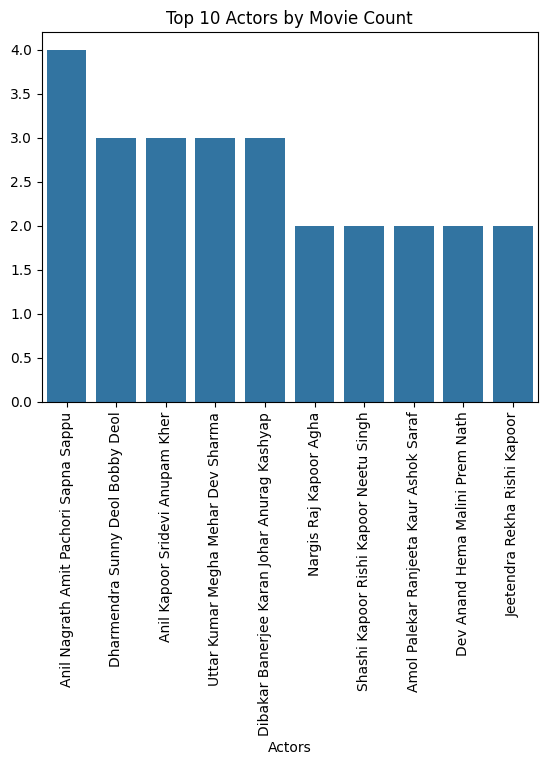

In [186]:
actor_count=india_movies_df['Actors'].value_counts().head(10)
sns.barplot(x=actor_count.index,y=actor_count.values)
plt.title('Top 10 Actors by Movie Count')
plt.xticks(rotation=90)
plt.show()

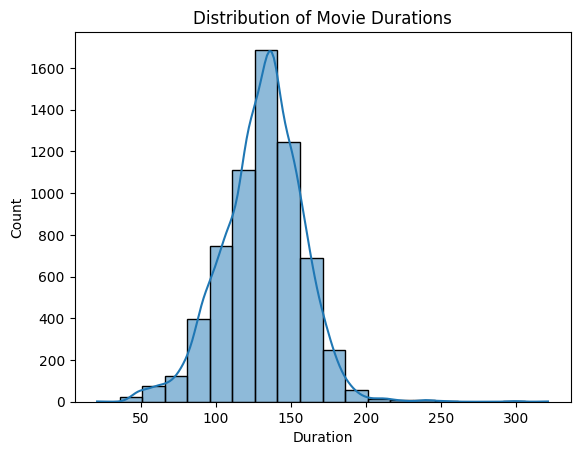

In [187]:
india_movies_df.loc[:,'Duration'] = india_movies_df['Duration'].astype(str).str.replace(' min', '', regex=False)
india_movies_df.loc[:,'Duration'] = pd.to_numeric(india_movies_df['Duration'], errors='coerce')
sns.histplot(india_movies_df['Duration'].dropna(), kde=True, bins=20)
plt.title('Distribution of Movie Durations')
plt.show()


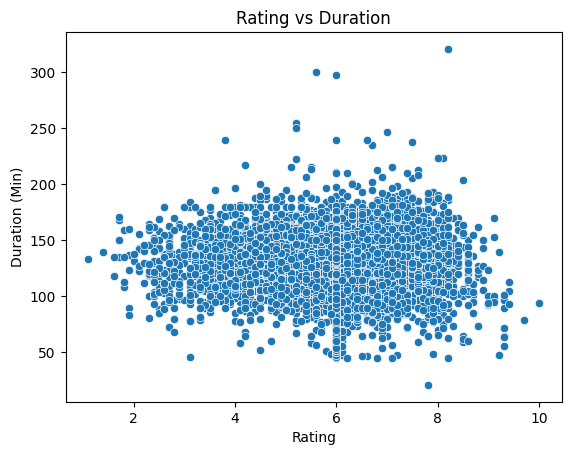

In [188]:
india_movies_df.loc[:,'Duration'] = india_movies_df['Duration'].astype(str).str.replace(' min', '', regex=False)
india_movies_df.loc[:,'Duration']=pd.to_numeric(india_movies_df['Duration'],errors='coerce')
sns.scatterplot(x='Rating',y='Duration',data=india_movies_df)
plt.title('Rating vs Duration')
plt.ylabel('Duration (Min)')
plt.show()

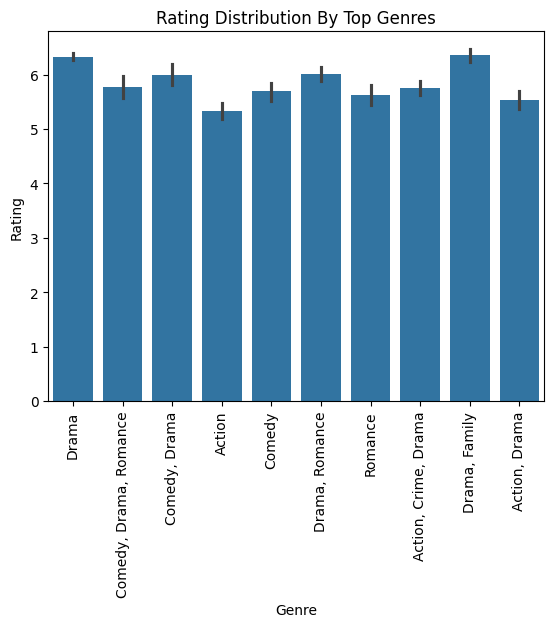

In [189]:
top_genres=india_movies_df['Genre'].value_counts().head(10).index
filtered_movies=india_movies_df[india_movies_df['Genre'].isin(top_genres)]
sns.barplot(x='Genre',y='Rating',data=filtered_movies)
plt.title('Rating Distribution By Top Genres')
plt.xticks(rotation=90)
plt.show()

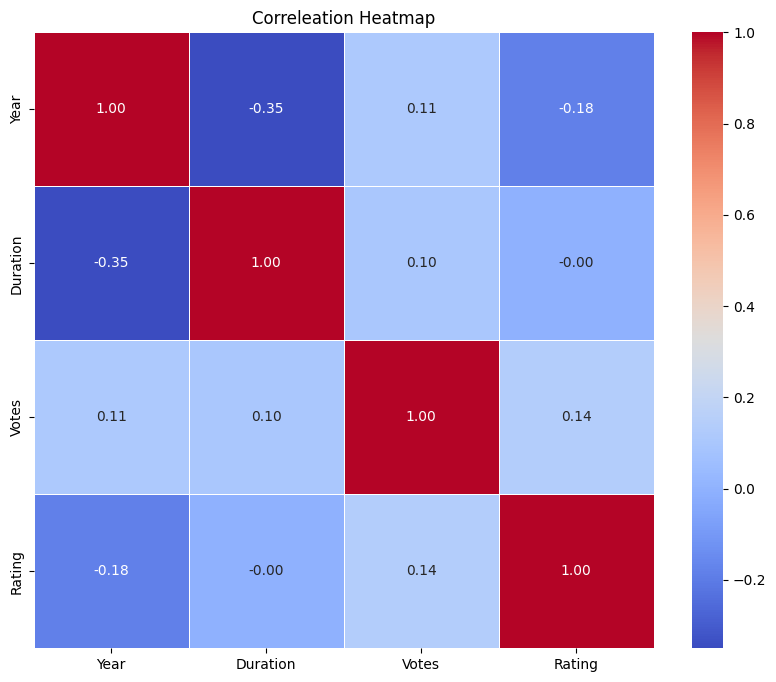

In [190]:
corr_matrix=india_movies_df[['Year','Duration','Votes','Rating']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correleation Heatmap')
plt.show()

Model

In [191]:
india_movies_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actors'],
      dtype='object')

In [192]:
X=india_movies_df[['Year','Duration','Votes']]
y=india_movies_df['Rating']

In [193]:
X

,Year,Duration,Votes
1,2019,109,8.0
2,2021,90,0.0
3,2019,110,35.0
4,2010,105,0.0
5,1997,147,827.0
...,...,...,...
15493,2015,115,408.0
15494,2001,153,1496.0
15503,1989,125,44.0
15505,1999,129,655.0


In [194]:
X.isnull().sum()

Year        0
Duration    0
Votes       0
dtype: int64

In [195]:
y.isnull().sum()

np.int64(0)

In [196]:
y.head()

1    7.0
2    6.0
3    4.4
4    6.0
5    4.7
Name: Rating, dtype: float64

Using Linear Regression

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [198]:
print(X_train.shape,X_test.shape)

(5155, 3) (1289, 3)


In [199]:
print(Y_train.shape,Y_test.shape)

(5155,) (1289,)


In [200]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [201]:
model.fit(X_train,Y_train)

LinearRegression()

Evaluation of Training data and Testing data

In [202]:
from sklearn.metrics import mean_squared_error
training_pred=model.predict(X_train)
mse_train=mean_squared_error(Y_train,training_pred)
print(f"Mean Squared Error of Training Data: {mse_train}")

Mean Squared Error of Training Data: 1.5940292999818177


In [203]:
testing_pred=model.predict(X_test)
mse_test=mean_squared_error(Y_test,testing_pred)
print(f"Mean Squared Error of Testing Data: {mse_test}")

Mean Squared Error of Testing Data: 1.415345350364015


In [204]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE: ", -scores.mean())

Cross-validated MSE:  1.572009747277989


Using Random Forest

In [205]:
genre_encoded = india_movies_df['Genre'].str.get_dummies(sep=', ')
director_encoded = india_movies_df['Director'].str.get_dummies(sep=', ')

In [206]:
X = pd.concat([india_movies_df[['Year', 'Duration', 'Votes']], genre_encoded, director_encoded], axis=1)
y = india_movies_df['Rating']

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [209]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [210]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error of Training Data:", train_mse)
print("Mean Squared Error of Testing Data:", test_mse)

Mean Squared Error of Training Data: 0.7965547413120697
Mean Squared Error of Testing Data: 1.0305163912148823
